In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = "data/client_dh_pov.csv"
client_dh = pd.read_csv(file_path)
client_dh

,prime-size,time
0,2048,64.816
1,2048,63.838
2,2048,64.227
3,1024,12.892
4,1024,12.807
5,1024,12.684
6,512,4.853
7,512,4.994
8,512,5.205


In [3]:
file_path = "data/server_dh_.csv"
server_dh = pd.read_csv(file_path)
server_dh

,prime-size,time
0,2048,1686.615
1,2048,942.936
2,2048,2739.377
3,1024,118.948
4,1024,349.633
5,1024,137.325
6,512,38.573
7,512,80.057
8,512,70.715


In [4]:
file_path = "data/encrypt.csv"
encrypt_times = pd.read_csv(file_path)
encrypt_times

,Size of msg,ns_encrypt_time(Client_side),ns_decrypt_time(Server_side)
0,1 byte,402000,255000
1,1 byte,404000,241000
2,1 byte,347000,243000
3,1024 bytes,1692000,321000
4,1024 bytes,1324000,489000
5,1024 bytes,1057000,344000
6,2048 bytes,2070000,1032000
7,2048 bytes,1548000,987000
8,2048 bytes,2054000,1113000
9,4096 bytes,2080000,1147000


In [5]:
df1 = client_dh.groupby("prime-size").mean()
df2 = server_dh.groupby("prime-size").mean()
both_comb = df1.merge(df2, on = "prime-size")
both_comb["Server Time"] = np.log(both_comb["time_x"])
both_comb["Client Time"] = np.log(both_comb["time_y"])

both_comb = both_comb.reset_index()
both_comb

,prime-size,time_x,time_y,Server Time,Client Time
0,512,5.017333,63.115000,1.612899,4.144958
1,1024,12.794333,201.968667,2.549002,5.308113
2,2048,64.293667,1789.642667,4.163461,7.489771


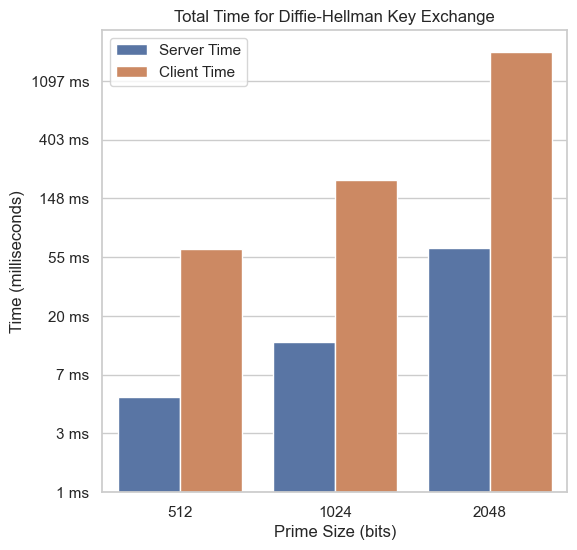

In [6]:
from matplotlib.ticker import FuncFormatter

both_comb_melted = both_comb.melt(id_vars='prime-size', value_vars=['Server Time', 'Client Time'], 
                                  var_name='Time Type', value_name='Time')

def format_func(value, tick_number):
    return f"{np.exp(value):.0f} ms"

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x='prime-size', y='Time', hue='Time Type', data=both_comb_melted, dodge=True)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.title('Total Time for Diffie-Hellman Key Exchange')
plt.xlabel('Prime Size (bits)')
plt.ylabel('Time (milliseconds)')
plt.legend()

plt.show()

In [7]:
encrypt_times["Encryption Time"] = encrypt_times["ns_encrypt_time(Client_side)"] / (10**6)
encrypt_times["Decrypt Time"] = encrypt_times["ns_decrypt_time(Server_side)"] / (10**6)

encrypt_times

,Size of msg,ns_encrypt_time(Client_side),ns_decrypt_time(Server_side),Encryption Time,Decrypt Time
0,1 byte,402000,255000,0.402,0.255
1,1 byte,404000,241000,0.404,0.241
2,1 byte,347000,243000,0.347,0.243
3,1024 bytes,1692000,321000,1.692,0.321
4,1024 bytes,1324000,489000,1.324,0.489
5,1024 bytes,1057000,344000,1.057,0.344
6,2048 bytes,2070000,1032000,2.070,1.032
7,2048 bytes,1548000,987000,1.548,0.987
8,2048 bytes,2054000,1113000,2.054,1.113
9,4096 bytes,2080000,1147000,2.080,1.147


In [8]:
grouped = encrypt_times.groupby("Size of msg").mean().reset_index()
grouped

,Size of msg,ns_encrypt_time(Client_side),ns_decrypt_time(Server_side),Encryption Time,Decrypt Time
0,1 byte,3.843333e+05,2.463333e+05,0.384333,0.246333
1,1024 bytes,1.357667e+06,3.846667e+05,1.357667,0.384667
2,2048 bytes,1.890667e+06,1.044000e+06,1.890667,1.044000
3,4096 bytes,2.059667e+06,1.252667e+06,2.059667,1.252667


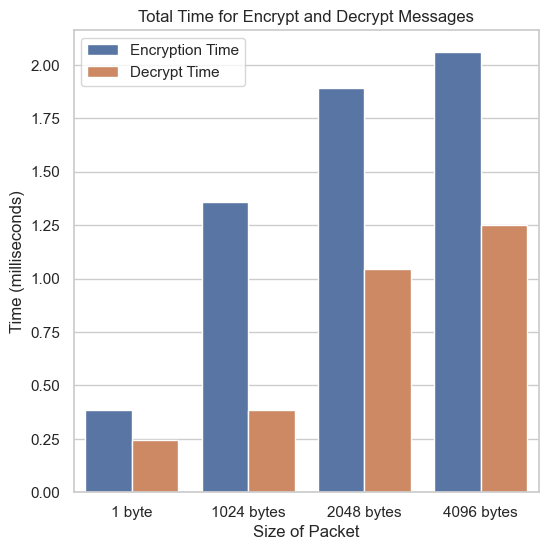

In [9]:
grouped_melted = grouped.melt(id_vars='Size of msg', value_vars=['Encryption Time', 'Decrypt Time'], 
                                  var_name='Time Type', value_name='Time')

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x='Size of msg', y='Time', hue='Time Type', data=grouped_melted, dodge=True)


plt.title('Total Time for Encrypt and Decrypt Messages')
plt.xlabel('Size of Packet')
plt.ylabel('Time (milliseconds)')
plt.legend()

plt.show()